In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
income2019blockgdf = gpd.read_file('incomeblocksbasemap.geojson')
income2019blockgdf.sample(10)

,geoid,block name,median income,geometry
122,15000US060014050002,"Block Group 2, Alameda, CA",140673.0,"MULTIPOLYGON (((-13606702.809 4552075.133, -13..."
255,15000US060014085004,"Block Group 4, Alameda, CA",61613.0,"MULTIPOLYGON (((-13601501.629 4545291.990, -13..."
39,15000US060014014001,"Block Group 1, Alameda, CA",38158.0,"MULTIPOLYGON (((-13611992.711 4554998.265, -13..."
312,15000US060014104001,"Block Group 1, Alameda, CA",75230.0,"MULTIPOLYGON (((-13599145.774 4543372.740, -13..."
94,15000US060014041022,"Block Group 2, Alameda, CA",73875.0,"MULTIPOLYGON (((-13609558.265 4555103.966, -13..."
247,15000US060014083003,"Block Group 3, Alameda, CA",116979.0,"MULTIPOLYGON (((-13599875.140 4547583.389, -13..."
262,15000US060014087003,"Block Group 3, Alameda, CA",96797.0,"MULTIPOLYGON (((-13602729.260 4546041.512, -13..."
155,15000US060014059012,"Block Group 2, Alameda, CA",39352.0,"MULTIPOLYGON (((-13607450.542 4549772.180, -13..."
8,15000US060014004002,"Block Group 2, Alameda, CA",80875.0,"MULTIPOLYGON (((-13610124.214 4557076.550, -13..."
130,15000US060014052004,"Block Group 4, Alameda, CA",92357.0,"MULTIPOLYGON (((-13608874.207 4551948.751, -13..."


In [3]:
income2019blockgdf['newgeoid'] = income2019blockgdf['geoid'].str[8:19]
income2019blockgdf.sample(5)

,geoid,block name,median income,geometry,newgeoid
132,15000US060014053012,"Block Group 2, Alameda, CA",81136.0,"MULTIPOLYGON (((-13609303.900 4551307.707, -13...",60014053012
101,15000US060014044001,"Block Group 1, Alameda, CA",153333.0,"MULTIPOLYGON (((-13607035.988 4558612.451, -13...",60014044001
102,15000US060014044002,"Block Group 2, Alameda, CA",146875.0,"MULTIPOLYGON (((-13605986.914 4557074.295, -13...",60014044002
303,15000US060014100002,"Block Group 2, Alameda, CA",93750.0,"MULTIPOLYGON (((-13597600.103 4543425.672, -13...",60014100002
107,15000US060014045023,"Block Group 3, Alameda, CA",169696.0,"MULTIPOLYGON (((-13603378.809 4556028.687, -13...",60014045023


In [4]:
checkgdf = income2019blockgdf.newgeoid.value_counts()
checkgdf.sort_values()

60014001001    1
60014003001    1
60014003002    1
60014003003    1
60014003004    1
              ..
60019819001    1
60019820001    1
60014103002    1
60014103003    1
60019832001    1
Name: newgeoid, Length: 319, dtype: int64

In [5]:
closed2009 = gpd.read_file('Closed2009.geojson')
closed2009.sample(5)

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry
284,"309,510",7/7/2009 9:14,Phone or Email,Streets - Potholes/Depression,STREETSW,37.730274,-122.183837,CLOSED,8/6/2009 10:21,CCD7,EL VERANO ST & ISLETON AV,Oakland,CA,30.0,POINT (-122.18384 37.73027)
123,"323,197",12/4/2009 12:36,Phone or Email,Streets - Potholes/Depression,STREETSW,37.819132,-122.253446,CLOSED,5/11/2010 13:02,CCD2,OAKLAND AV & MACARTHUR BLVD,Oakland,CA,158.0,POINT (-122.25345 37.81913)
33,"320,336",11/2/2009 8:18,Phone or Email,Streets/Sidewalks - Pooling Water,STREETSW,37.819795,-122.250241,CLOSED,3/7/2011 16:34,CCD2,686 MARIPOSA AV,Oakland,CA,490.3,POINT (-122.25024 37.81979)
97,"311,303",7/28/2009 10:50,Phone or Email,Streets - Potholes/Depression,STREETSW,37.824438,-122.258627,CLOSED,1/27/2010 14:23,CCD1,BROADWAY & W MACARTHUR BLVD,Oakland,CA,183.1,POINT (-122.25863 37.82444)
8,"316,193",9/22/2009 8:54,Phone or Email,Streets/Sidewalks - Curb & Gutter Repair,STREETSW,37.797817,-122.198817,CLOSED,7/9/2013 15:21,CCD4,4026 ASPEN PL,Oakland,CA,1386.3,POINT (-122.19882 37.79782)


In [6]:
closed2009.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        488 non-null    object  
 1   DATETIMEINIT     488 non-null    object  
 2   SOURCE           488 non-null    object  
 3   DESCRIPTION      488 non-null    object  
 4   REQCATEGORY      488 non-null    object  
 5   LAT              488 non-null    float64 
 6   LONG             488 non-null    float64 
 7   STATUS           488 non-null    object  
 8   DATETIMECLOSED   488 non-null    object  
 9   COUNCILDISTRICT  488 non-null    object  
 10  PROBADDRESS      488 non-null    object  
 11  City             488 non-null    object  
 12  State            488 non-null    object  
 13  TIMETOCLOSE      488 non-null    float64 
 14  geometry         488 non-null    geometry
dtypes: float64(3), geometry(1), object(11)
memory usage: 57.3+ KB


In [7]:
closed2009['TIMETOCLOSE'].describe()

count     488.000000
mean      154.924795
std       305.897781
min         0.000000
25%        13.975000
50%        51.500000
75%       160.375000
max      2508.400000
Name: TIMETOCLOSE, dtype: float64

In [8]:
closed2009['TIMETOCLOSE'].mean()

154.92479508196723

In [9]:
closed2009['TIMETOCLOSE'].median()

51.5

In [10]:
polydf = gpd.read_file('Data/Alameda_Census_Blocks_2010.geojson')

In [11]:
joinedgdf = gpd.sjoin(closed2009, polydf, how="left")

In [12]:
pd.set_option('display.max_columns', None)
joinedgdf

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry,index_right,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10
0,"312,392",8/11/2009 9:47,Phone or Email,Streets - Street Deterioration,STREETSW,37.769205,-122.204626,CLOSED,6/23/2016 19:04,CCD6,1521 54TH AV,Oakland,CA,2508.4,POINT (-122.20463 37.76920),11540,06,G5040,,Block 1011,+37.7700052,1011,0,S,49663,060014074001011,407400,-122.2050987,,001
1,"310,597",7/20/2009 14:30,Phone or Email,Streets - Street Deterioration,STREETSW,37.760284,-122.202325,CLOSED,8/7/2015 9:53,CCD6,1100 62ND AVE,Oakland,CA,2208.8,POINT (-122.20232 37.76028),17279,06,G5040,,Block 4014,+37.7593981,4014,0,S,154949,060014088004014,408800,-122.2005301,,001
2,"313,730",8/25/2009 11:40,Phone or Email,Streets/Sidewalks Maintenance - General,STREETSW,37.772975,-122.189995,CLOSED,7/21/2015 10:54,CCD6,5807 FLEMING AV,Oakland,CA,2156.0,POINT (-122.19000 37.77298),17481,06,G5040,,Block 1026,+37.7736084,1026,0,S,23040,060014077001026,407700,-122.1903337,,001
3,"321,710",11/13/2009 14:59,Phone or Email,Streets - Street Deterioration,STREETSW,37.770417,-122.181830,CLOSED,7/21/2015 16:33,CCD6,FOOTHILL BLVD & HAVENSCOURT BLVD,Oakland,CA,2076.1,POINT (-122.18183 37.77042),10301,06,G5040,,Block 2003,+37.7702147,2003,0,S,26358,060014087002003,408700,-122.1833622,,001
4,"320,858",11/5/2009 9:14,Phone or Email,Streets - Street Deterioration,STREETSW,37.737952,-122.171227,CLOSED,5/14/2014 17:14,CCD7,104TH AV & ROYAL ANN ST,Oakland,CA,1651.3,POINT (-122.17123 37.73795),13703,06,G5040,,Block 3021,+37.7372270,3021,0,S,14897,060014093003021,409300,-122.1719754,,001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,"317,437",10/5/2009 12:11,Phone or Email,Streets - Potholes/Depression,STREETSW,37.819132,-122.253446,CLOSED,10/5/2009 14:09,CCD2,OAKLAND AV & SANTA CLARA AV,Oakland,CA,0.1,POINT (-122.25345 37.81913),1144,06,G5040,,Block 3003,+37.8179430,3003,0,S,14773,060014039003003,403900,-122.2522485,,001
484,"317,054",9/30/2009 13:50,Phone or Email,Streets - Potholes/Depression,STREETSW,37.779467,-122.205585,CLOSED,9/30/2009 15:09,CCD5,CONGRESS AV & COURTLAND AV,Oakland,CA,0.1,POINT (-122.20558 37.77947),15231,06,G5040,,Block 2003,+37.7783195,2003,0,S,35358,060014076002003,407600,-122.2036997,,001
485,"322,684",11/25/2009 11:17,Phone or Email,Streets/Sidewalks - Portable Barriers Maint,STREETSW,37.864062,-122.233286,CLOSED,11/25/2009 11:20,CCD1,CLAREMONT AV & RISPIN DR,Oakland,CA,0.0,POINT (-122.23329 37.86406),18852,06,G5040,,Block 1015,+37.8652740,1015,0,S,144504,060014001001015,400100,-122.2340224,,001
486,"317,946",10/8/2009 15:58,Phone or Email,Streets - Potholes/Depression,STREETSW,37.832965,-122.264887,CLOSED,10/8/2009 16:00,CCD1,541 45TH STREET,Oakland,CA,0.0,POINT (-122.26489 37.83297),5109,06,G5040,,Block 4026,+37.8314778,4026,0,S,30170,060014011004026,401100,-122.2654023,,001


In [16]:
joinedgdf['geoid10'].value_counts()

060014039003003    14
060014044003000     5
060014003001010     4
060014079003007     3
060014046004005     3
                   ..
060014092001008     1
060014038004012     1
060014062011001     1
060014049004015     1
060014002002006     1
Name: geoid10, Length: 398, dtype: int64

In [13]:
countdf = joinedgdf['geoid10'].value_counts().rename_axis('geoid10').reset_index(name='counts')
print (countdf)

             geoid10  counts
0    060014039003003      14
1    060014044003000       5
2    060014003001010       4
3    060014079003007       3
4    060014046004005       3
..               ...     ...
393  060014092001008       1
394  060014038004012       1
395  060014062011001       1
396  060014049004015       1
397  060014002002006       1

[398 rows x 2 columns]


In [14]:
blockcountgdf = polydf.merge(countdf,on='geoid10')
blockcountgdf

,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,geometry,counts
0,06,G5040,,Block 1027,+37.7963903,1027,0,S,11001,060019832001027,983200,-122.2784441,,001,"MULTIPOLYGON (((-122.27761 37.79654, -122.2777...",1
1,06,G5040,,Block 1000,+37.8036170,1000,0,S,950,060014030001000,403000,-122.2693951,,001,"MULTIPOLYGON (((-122.26884 37.80336, -122.2700...",1
2,06,G5040,,Block 2005,+37.8455877,2005,0,S,15180,060014008002005,400800,-122.2865102,,001,"MULTIPOLYGON (((-122.28721 37.84493, -122.2872...",1
3,06,G5040,,Block 2008,+37.8008155,2008,0,S,40287,060014049002008,404900,-122.2210885,,001,"MULTIPOLYGON (((-122.22010 37.80001, -122.2201...",1
4,06,G5040,,Block 3006,+37.7844635,3006,0,S,33315,060014070003006,407000,-122.2023087,,001,"MULTIPOLYGON (((-122.20160 37.78513, -122.2014...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,06,G5040,,Block 1019,+37.8044133,1019,0,S,20400,060014052001019,405200,-122.2419411,,001,"MULTIPOLYGON (((-122.24087 37.80474, -122.2410...",1
394,06,G5040,,Block 1000,+37.8041112,1000,0,S,11800,060014053011000,405301,-122.2500682,,001,"MULTIPOLYGON (((-122.25087 37.80416, -122.2507...",1
395,06,G5040,,Block 4013,+37.7999683,4013,0,S,24311,060014055004013,405500,-122.2461120,,001,"MULTIPOLYGON (((-122.24648 37.80105, -122.2464...",1
396,06,G5040,,Block 4011,+37.7753540,4011,0,S,10553,060014071024011,407102,-122.2118317,,001,"MULTIPOLYGON (((-122.21283 37.77559, -122.2125...",1


In [15]:
sorted_blockcountgdf = blockcountgdf.sort_values(by='counts',ascending = False)
sorted_blockcountgdf

,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,geometry,counts
24,06,G5040,,Block 3003,+37.8179430,3003,0,S,14773,060014039003003,403900,-122.2522485,,001,"MULTIPOLYGON (((-122.25136 37.81622, -122.2514...",14
343,06,G5040,,Block 3000,+37.8476533,3000,0,S,474840,060014044003000,404400,-122.2079876,,001,"MULTIPOLYGON (((-122.20859 37.84672, -122.2083...",5
377,06,G5040,,Block 1010,+37.8431466,1010,0,S,41260,060014003001010,400300,-122.2489861,,001,"MULTIPOLYGON (((-122.25158 37.84246, -122.2515...",4
29,06,G5040,,Block 1005,+37.7973751,1005,0,S,15490,060019832001005,983200,-122.2736820,,001,"MULTIPOLYGON (((-122.27262 37.79730, -122.2727...",3
324,06,G5040,,Block 4015,+37.8273103,4015,0,S,102849,060014045024015,404502,-122.2085940,,001,"MULTIPOLYGON (((-122.20626 37.82440, -122.2066...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,06,G5040,,Block 3005,+37.7429927,3005,0,S,18047,060014104003005,410400,-122.1640024,,001,"MULTIPOLYGON (((-122.16509 37.74235, -122.1651...",1
147,06,G5040,,Block 2017,+37.7513644,2017,0,S,814,060014095002017,409500,-122.1813667,,001,"MULTIPOLYGON (((-122.18216 37.75097, -122.1821...",1
146,06,G5040,,Block 3022,+37.8047808,3022,0,S,941,060014050003022,405000,-122.2327526,,001,"MULTIPOLYGON (((-122.23231 37.80493, -122.2323...",1
145,06,G5040,,Block 1001,+37.7947406,1001,0,S,68612,060014079001001,407900,-122.1841837,,001,"MULTIPOLYGON (((-122.18252 37.79338, -122.1828...",1


<AxesSubplot:>

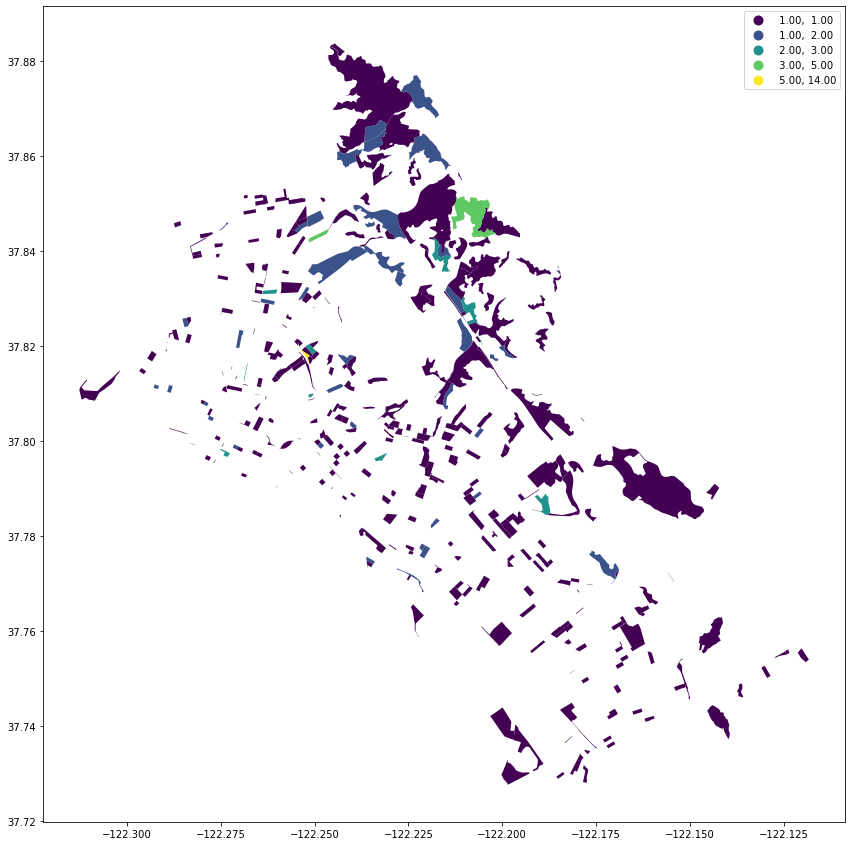

In [16]:
blockcountgdf.plot(figsize=(15,15),
                 column='counts',
                 legend=True, 
                 scheme='NaturalBreaks')

In [17]:
blockcountgdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
gdf_web_mercator = blockcountgdf.to_crs(epsg=3857)

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


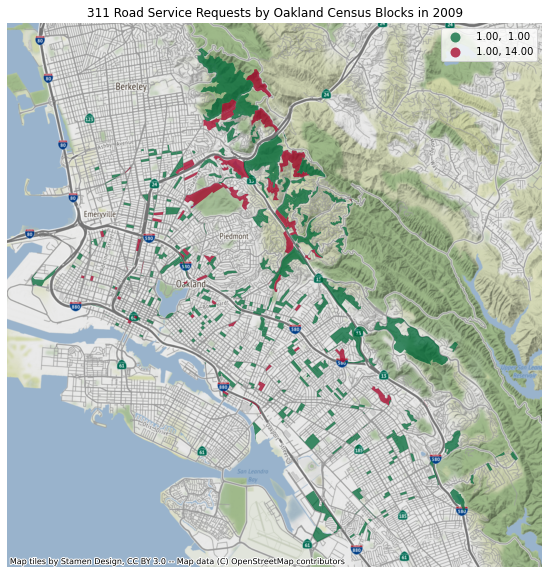

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_web_mercator.plot(column='counts', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=4, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax,
            legend=True
           )

ax.axis("off")
ax.set_title("311 Road Service Requests by Oakland Census Blocks in 2009")
ctx.add_basemap(ax)

In [20]:
blockcountgdf['counts'].describe()

count    398.000000
mean       1.226131
std        0.818009
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       14.000000
Name: counts, dtype: float64

<AxesSubplot:ylabel='Frequency'>

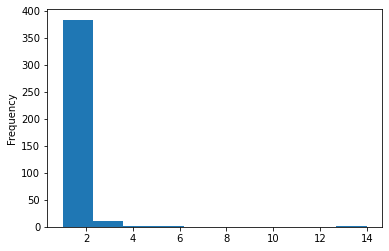

In [21]:
blockcountgdf['counts'].plot.hist(bins=10)

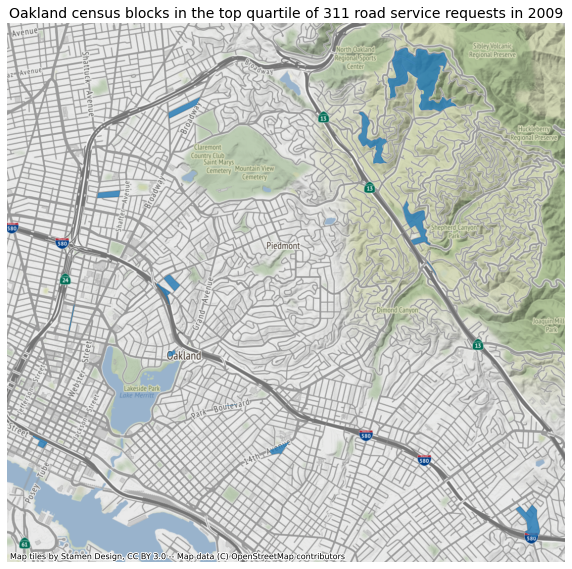

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_web_mercator[gdf_web_mercator['counts'] > 2].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Oakland census blocks in the top quartile of 311 road service requests in 2009',fontsize=14)

# add a basemap
ctx.add_basemap(ax)

In [23]:
joinedgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        488 non-null    object  
 1   DATETIMEINIT     488 non-null    object  
 2   SOURCE           488 non-null    object  
 3   DESCRIPTION      488 non-null    object  
 4   REQCATEGORY      488 non-null    object  
 5   LAT              488 non-null    float64 
 6   LONG             488 non-null    float64 
 7   STATUS           488 non-null    object  
 8   DATETIMECLOSED   488 non-null    object  
 9   COUNCILDISTRICT  488 non-null    object  
 10  PROBADDRESS      488 non-null    object  
 11  City             488 non-null    object  
 12  State            488 non-null    object  
 13  TIMETOCLOSE      488 non-null    float64 
 14  geometry         488 non-null    geometry
 15  index_right      488 non-null    int64   
 16  statefp10        488 non-null    obj

In [24]:
joinedgdf.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry,index_right,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10
0,"312,392",8/11/2009 9:47,Phone or Email,Streets - Street Deterioration,STREETSW,37.769205,-122.204626,CLOSED,6/23/2016 19:04,CCD6,1521 54TH AV,Oakland,CA,2508.4,POINT (-122.20463 37.76920),11540,06,G5040,,Block 1011,+37.7700052,1011,0,S,49663,060014074001011,407400,-122.2050987,,001
1,"310,597",7/20/2009 14:30,Phone or Email,Streets - Street Deterioration,STREETSW,37.760284,-122.202325,CLOSED,8/7/2015 9:53,CCD6,1100 62ND AVE,Oakland,CA,2208.8,POINT (-122.20232 37.76028),17279,06,G5040,,Block 4014,+37.7593981,4014,0,S,154949,060014088004014,408800,-122.2005301,,001
2,"313,730",8/25/2009 11:40,Phone or Email,Streets/Sidewalks Maintenance - General,STREETSW,37.772975,-122.189995,CLOSED,7/21/2015 10:54,CCD6,5807 FLEMING AV,Oakland,CA,2156.0,POINT (-122.19000 37.77298),17481,06,G5040,,Block 1026,+37.7736084,1026,0,S,23040,060014077001026,407700,-122.1903337,,001
3,"321,710",11/13/2009 14:59,Phone or Email,Streets - Street Deterioration,STREETSW,37.770417,-122.181830,CLOSED,7/21/2015 16:33,CCD6,FOOTHILL BLVD & HAVENSCOURT BLVD,Oakland,CA,2076.1,POINT (-122.18183 37.77042),10301,06,G5040,,Block 2003,+37.7702147,2003,0,S,26358,060014087002003,408700,-122.1833622,,001
4,"320,858",11/5/2009 9:14,Phone or Email,Streets - Street Deterioration,STREETSW,37.737952,-122.171227,CLOSED,5/14/2014 17:14,CCD7,104TH AV & ROYAL ANN ST,Oakland,CA,1651.3,POINT (-122.17123 37.73795),13703,06,G5040,,Block 3021,+37.7372270,3021,0,S,14897,060014093003021,409300,-122.1719754,,001


In [25]:
joinedgdf['TIMETOCLOSE'] = joinedgdf['TIMETOCLOSE'].astype('int64')

In [26]:
joinedgdf.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry,index_right,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10
0,"312,392",8/11/2009 9:47,Phone or Email,Streets - Street Deterioration,STREETSW,37.769205,-122.204626,CLOSED,6/23/2016 19:04,CCD6,1521 54TH AV,Oakland,CA,2508,POINT (-122.20463 37.76920),11540,06,G5040,,Block 1011,+37.7700052,1011,0,S,49663,060014074001011,407400,-122.2050987,,001
1,"310,597",7/20/2009 14:30,Phone or Email,Streets - Street Deterioration,STREETSW,37.760284,-122.202325,CLOSED,8/7/2015 9:53,CCD6,1100 62ND AVE,Oakland,CA,2208,POINT (-122.20232 37.76028),17279,06,G5040,,Block 4014,+37.7593981,4014,0,S,154949,060014088004014,408800,-122.2005301,,001
2,"313,730",8/25/2009 11:40,Phone or Email,Streets/Sidewalks Maintenance - General,STREETSW,37.772975,-122.189995,CLOSED,7/21/2015 10:54,CCD6,5807 FLEMING AV,Oakland,CA,2156,POINT (-122.19000 37.77298),17481,06,G5040,,Block 1026,+37.7736084,1026,0,S,23040,060014077001026,407700,-122.1903337,,001
3,"321,710",11/13/2009 14:59,Phone or Email,Streets - Street Deterioration,STREETSW,37.770417,-122.181830,CLOSED,7/21/2015 16:33,CCD6,FOOTHILL BLVD & HAVENSCOURT BLVD,Oakland,CA,2076,POINT (-122.18183 37.77042),10301,06,G5040,,Block 2003,+37.7702147,2003,0,S,26358,060014087002003,408700,-122.1833622,,001
4,"320,858",11/5/2009 9:14,Phone or Email,Streets - Street Deterioration,STREETSW,37.737952,-122.171227,CLOSED,5/14/2014 17:14,CCD7,104TH AV & ROYAL ANN ST,Oakland,CA,1651,POINT (-122.17123 37.73795),13703,06,G5040,,Block 3021,+37.7372270,3021,0,S,14897,060014093003021,409300,-122.1719754,,001


In [27]:
gdf_grouped = joinedgdf.groupby(['geoid10']).median()[['TIMETOCLOSE']]
gdf_grouped.head(10)

,TIMETOCLOSE
geoid10,
060014001001007,12.0
060014001001015,525.5
060014001001021,173.0
060014001001024,128.5
060014001001027,25.0
060014001001030,6.5
060014001001033,70.0
060014001001039,298.5
060014001001045,17.0


In [28]:
closetimedf = gdf_grouped.rename_axis('geoid10').reset_index('geoid10')
print (closetimedf)

             geoid10  TIMETOCLOSE
0    060014001001007         12.0
1    060014001001015        525.5
2    060014001001021        173.0
3    060014001001024        128.5
4    060014001001027         25.0
..               ...          ...
393  060019820001005        160.0
394  060019820001021          4.0
395  060019832001005         89.0
396  060019832001027         36.0
397  060019832001055         36.0

[398 rows x 2 columns]


In [29]:
closetimedf.columns = ['geoid10', 'closure_median']
closetimedf

,geoid10,closure_median
0,060014001001007,12.0
1,060014001001015,525.5
2,060014001001021,173.0
3,060014001001024,128.5
4,060014001001027,25.0
...,...,...
393,060019820001005,160.0
394,060019820001021,4.0
395,060019832001005,89.0
396,060019832001027,36.0


In [30]:
closetimegdf = polydf.merge(closetimedf,on='geoid10')
closetimegdf

,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,geometry,closure_median
0,06,G5040,,Block 1027,+37.7963903,1027,0,S,11001,060019832001027,983200,-122.2784441,,001,"MULTIPOLYGON (((-122.27761 37.79654, -122.2777...",36.0
1,06,G5040,,Block 1000,+37.8036170,1000,0,S,950,060014030001000,403000,-122.2693951,,001,"MULTIPOLYGON (((-122.26884 37.80336, -122.2700...",141.0
2,06,G5040,,Block 2005,+37.8455877,2005,0,S,15180,060014008002005,400800,-122.2865102,,001,"MULTIPOLYGON (((-122.28721 37.84493, -122.2872...",21.0
3,06,G5040,,Block 2008,+37.8008155,2008,0,S,40287,060014049002008,404900,-122.2210885,,001,"MULTIPOLYGON (((-122.22010 37.80001, -122.2201...",192.0
4,06,G5040,,Block 3006,+37.7844635,3006,0,S,33315,060014070003006,407000,-122.2023087,,001,"MULTIPOLYGON (((-122.20160 37.78513, -122.2014...",30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,06,G5040,,Block 1019,+37.8044133,1019,0,S,20400,060014052001019,405200,-122.2419411,,001,"MULTIPOLYGON (((-122.24087 37.80474, -122.2410...",56.0
394,06,G5040,,Block 1000,+37.8041112,1000,0,S,11800,060014053011000,405301,-122.2500682,,001,"MULTIPOLYGON (((-122.25087 37.80416, -122.2507...",4.0
395,06,G5040,,Block 4013,+37.7999683,4013,0,S,24311,060014055004013,405500,-122.2461120,,001,"MULTIPOLYGON (((-122.24648 37.80105, -122.2464...",89.0
396,06,G5040,,Block 4011,+37.7753540,4011,0,S,10553,060014071024011,407102,-122.2118317,,001,"MULTIPOLYGON (((-122.21283 37.77559, -122.2125...",28.0


In [31]:
closetimegdf_web_mercator = closetimegdf.to_crs(epsg=3857)

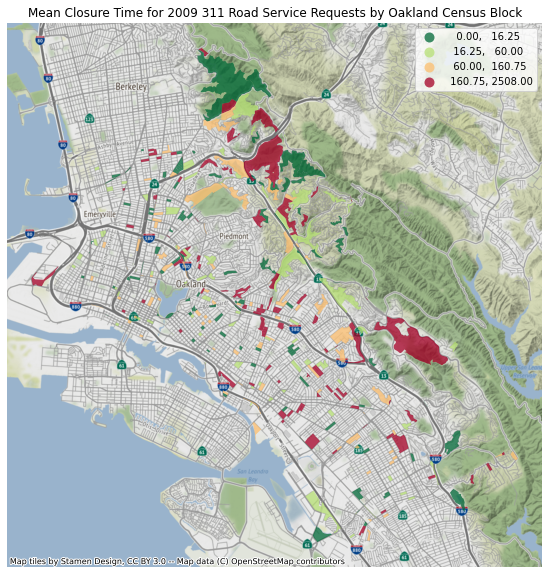

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))

closetimegdf_web_mercator.plot(column='closure_median', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=4, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax,
            legend=True
           )

ax.axis("off")
ax.set_title("Mean Closure Time for 2009 311 Road Service Requests by Oakland Census Block")
ctx.add_basemap(ax)

In [33]:
closetimegdf['closure_median'].describe()

count     398.000000
mean      160.815327
std       316.151409
min         0.000000
25%        16.250000
50%        60.000000
75%       160.750000
max      2508.000000
Name: closure_median, dtype: float64

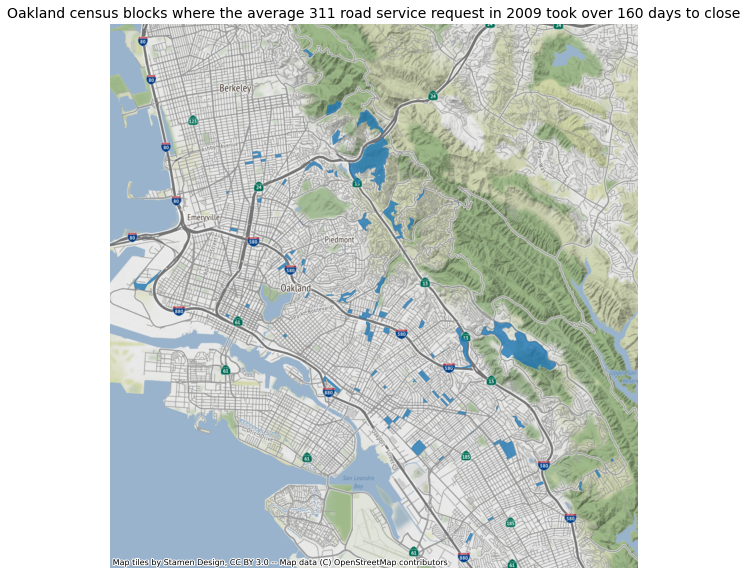

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
closetimegdf_web_mercator[closetimegdf_web_mercator['closure_median'] > 160].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Oakland census blocks where the average 311 road service request in 2009 took over 160 days to close',fontsize=14)

ctx.add_basemap(ax)

In [40]:
blockcountgdf

,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,geometry,counts
0,06,G5040,,Block 1027,+37.7963903,1027,0,S,11001,060019832001027,983200,-122.2784441,,001,"MULTIPOLYGON (((-122.27761 37.79654, -122.2777...",1
1,06,G5040,,Block 1000,+37.8036170,1000,0,S,950,060014030001000,403000,-122.2693951,,001,"MULTIPOLYGON (((-122.26884 37.80336, -122.2700...",1
2,06,G5040,,Block 2005,+37.8455877,2005,0,S,15180,060014008002005,400800,-122.2865102,,001,"MULTIPOLYGON (((-122.28721 37.84493, -122.2872...",1
3,06,G5040,,Block 2008,+37.8008155,2008,0,S,40287,060014049002008,404900,-122.2210885,,001,"MULTIPOLYGON (((-122.22010 37.80001, -122.2201...",1
4,06,G5040,,Block 3006,+37.7844635,3006,0,S,33315,060014070003006,407000,-122.2023087,,001,"MULTIPOLYGON (((-122.20160 37.78513, -122.2014...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,06,G5040,,Block 1019,+37.8044133,1019,0,S,20400,060014052001019,405200,-122.2419411,,001,"MULTIPOLYGON (((-122.24087 37.80474, -122.2410...",1
394,06,G5040,,Block 1000,+37.8041112,1000,0,S,11800,060014053011000,405301,-122.2500682,,001,"MULTIPOLYGON (((-122.25087 37.80416, -122.2507...",1
395,06,G5040,,Block 4013,+37.7999683,4013,0,S,24311,060014055004013,405500,-122.2461120,,001,"MULTIPOLYGON (((-122.24648 37.80105, -122.2464...",1
396,06,G5040,,Block 4011,+37.7753540,4011,0,S,10553,060014071024011,407102,-122.2118317,,001,"MULTIPOLYGON (((-122.21283 37.77559, -122.2125...",1


In [41]:
joinedgdf

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry,index_right,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10
0,"312,392",8/11/2009 9:47,Phone or Email,Streets - Street Deterioration,STREETSW,37.769205,-122.204626,CLOSED,6/23/2016 19:04,CCD6,1521 54TH AV,Oakland,CA,2508,POINT (-122.20463 37.76920),11540,06,G5040,,Block 1011,+37.7700052,1011,0,S,49663,060014074001011,407400,-122.2050987,,001
1,"310,597",7/20/2009 14:30,Phone or Email,Streets - Street Deterioration,STREETSW,37.760284,-122.202325,CLOSED,8/7/2015 9:53,CCD6,1100 62ND AVE,Oakland,CA,2208,POINT (-122.20232 37.76028),17279,06,G5040,,Block 4014,+37.7593981,4014,0,S,154949,060014088004014,408800,-122.2005301,,001
2,"313,730",8/25/2009 11:40,Phone or Email,Streets/Sidewalks Maintenance - General,STREETSW,37.772975,-122.189995,CLOSED,7/21/2015 10:54,CCD6,5807 FLEMING AV,Oakland,CA,2156,POINT (-122.19000 37.77298),17481,06,G5040,,Block 1026,+37.7736084,1026,0,S,23040,060014077001026,407700,-122.1903337,,001
3,"321,710",11/13/2009 14:59,Phone or Email,Streets - Street Deterioration,STREETSW,37.770417,-122.181830,CLOSED,7/21/2015 16:33,CCD6,FOOTHILL BLVD & HAVENSCOURT BLVD,Oakland,CA,2076,POINT (-122.18183 37.77042),10301,06,G5040,,Block 2003,+37.7702147,2003,0,S,26358,060014087002003,408700,-122.1833622,,001
4,"320,858",11/5/2009 9:14,Phone or Email,Streets - Street Deterioration,STREETSW,37.737952,-122.171227,CLOSED,5/14/2014 17:14,CCD7,104TH AV & ROYAL ANN ST,Oakland,CA,1651,POINT (-122.17123 37.73795),13703,06,G5040,,Block 3021,+37.7372270,3021,0,S,14897,060014093003021,409300,-122.1719754,,001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,"317,437",10/5/2009 12:11,Phone or Email,Streets - Potholes/Depression,STREETSW,37.819132,-122.253446,CLOSED,10/5/2009 14:09,CCD2,OAKLAND AV & SANTA CLARA AV,Oakland,CA,0,POINT (-122.25345 37.81913),1144,06,G5040,,Block 3003,+37.8179430,3003,0,S,14773,060014039003003,403900,-122.2522485,,001
484,"317,054",9/30/2009 13:50,Phone or Email,Streets - Potholes/Depression,STREETSW,37.779467,-122.205585,CLOSED,9/30/2009 15:09,CCD5,CONGRESS AV & COURTLAND AV,Oakland,CA,0,POINT (-122.20558 37.77947),15231,06,G5040,,Block 2003,+37.7783195,2003,0,S,35358,060014076002003,407600,-122.2036997,,001
485,"322,684",11/25/2009 11:17,Phone or Email,Streets/Sidewalks - Portable Barriers Maint,STREETSW,37.864062,-122.233286,CLOSED,11/25/2009 11:20,CCD1,CLAREMONT AV & RISPIN DR,Oakland,CA,0,POINT (-122.23329 37.86406),18852,06,G5040,,Block 1015,+37.8652740,1015,0,S,144504,060014001001015,400100,-122.2340224,,001
486,"317,946",10/8/2009 15:58,Phone or Email,Streets - Potholes/Depression,STREETSW,37.832965,-122.264887,CLOSED,10/8/2009 16:00,CCD1,541 45TH STREET,Oakland,CA,0,POINT (-122.26489 37.83297),5109,06,G5040,,Block 4026,+37.8314778,4026,0,S,30170,060014011004026,401100,-122.2654023,,001


In [45]:
joinedgdf['counts'] = blockcountgdf['counts']

In [46]:
joinedgdf

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry,index_right,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,counts
0,"312,392",8/11/2009 9:47,Phone or Email,Streets - Street Deterioration,STREETSW,37.769205,-122.204626,CLOSED,6/23/2016 19:04,CCD6,1521 54TH AV,Oakland,CA,2508,POINT (-122.20463 37.76920),11540,06,G5040,,Block 1011,+37.7700052,1011,0,S,49663,060014074001011,407400,-122.2050987,,001,1.0
1,"310,597",7/20/2009 14:30,Phone or Email,Streets - Street Deterioration,STREETSW,37.760284,-122.202325,CLOSED,8/7/2015 9:53,CCD6,1100 62ND AVE,Oakland,CA,2208,POINT (-122.20232 37.76028),17279,06,G5040,,Block 4014,+37.7593981,4014,0,S,154949,060014088004014,408800,-122.2005301,,001,1.0
2,"313,730",8/25/2009 11:40,Phone or Email,Streets/Sidewalks Maintenance - General,STREETSW,37.772975,-122.189995,CLOSED,7/21/2015 10:54,CCD6,5807 FLEMING AV,Oakland,CA,2156,POINT (-122.19000 37.77298),17481,06,G5040,,Block 1026,+37.7736084,1026,0,S,23040,060014077001026,407700,-122.1903337,,001,1.0
3,"321,710",11/13/2009 14:59,Phone or Email,Streets - Street Deterioration,STREETSW,37.770417,-122.181830,CLOSED,7/21/2015 16:33,CCD6,FOOTHILL BLVD & HAVENSCOURT BLVD,Oakland,CA,2076,POINT (-122.18183 37.77042),10301,06,G5040,,Block 2003,+37.7702147,2003,0,S,26358,060014087002003,408700,-122.1833622,,001,1.0
4,"320,858",11/5/2009 9:14,Phone or Email,Streets - Street Deterioration,STREETSW,37.737952,-122.171227,CLOSED,5/14/2014 17:14,CCD7,104TH AV & ROYAL ANN ST,Oakland,CA,1651,POINT (-122.17123 37.73795),13703,06,G5040,,Block 3021,+37.7372270,3021,0,S,14897,060014093003021,409300,-122.1719754,,001,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,"317,437",10/5/2009 12:11,Phone or Email,Streets - Potholes/Depression,STREETSW,37.819132,-122.253446,CLOSED,10/5/2009 14:09,CCD2,OAKLAND AV & SANTA CLARA AV,Oakland,CA,0,POINT (-122.25345 37.81913),1144,06,G5040,,Block 3003,+37.8179430,3003,0,S,14773,060014039003003,403900,-122.2522485,,001,NaN
484,"317,054",9/30/2009 13:50,Phone or Email,Streets - Potholes/Depression,STREETSW,37.779467,-122.205585,CLOSED,9/30/2009 15:09,CCD5,CONGRESS AV & COURTLAND AV,Oakland,CA,0,POINT (-122.20558 37.77947),15231,06,G5040,,Block 2003,+37.7783195,2003,0,S,35358,060014076002003,407600,-122.2036997,,001,NaN
485,"322,684",11/25/2009 11:17,Phone or Email,Streets/Sidewalks - Portable Barriers Maint,STREETSW,37.864062,-122.233286,CLOSED,11/25/2009 11:20,CCD1,CLAREMONT AV & RISPIN DR,Oakland,CA,0,POINT (-122.23329 37.86406),18852,06,G5040,,Block 1015,+37.8652740,1015,0,S,144504,060014001001015,400100,-122.2340224,,001,NaN
486,"317,946",10/8/2009 15:58,Phone or Email,Streets - Potholes/Depression,STREETSW,37.832965,-122.264887,CLOSED,10/8/2009 16:00,CCD1,541 45TH STREET,Oakland,CA,0,POINT (-122.26489 37.83297),5109,06,G5040,,Block 4026,+37.8314778,4026,0,S,30170,060014011004026,401100,-122.2654023,,001,NaN


In [49]:
joinedgdf['geoid10'].value_counts

<bound method IndexOpsMixin.value_counts of 0      060014074001011
1      060014088004014
2      060014077001026
3      060014087002003
4      060014093003021
            ...       
483    060014039003003
484    060014076002003
485    060014001001015
486    060014011004026
487    060014002002006
Name: geoid10, Length: 488, dtype: object>

In [50]:
countdf = joinedgdf['geoid10'].value_counts().rename_axis('geoid10').reset_index(name='counts')
print (countdf)

             geoid10  counts
0    060014039003003      14
1    060014044003000       5
2    060014003001010       4
3    060014079003007       3
4    060014046004005       3
..               ...     ...
393  060014092001008       1
394  060014038004012       1
395  060014062011001       1
396  060014049004015       1
397  060014002002006       1

[398 rows x 2 columns]


In [51]:
blockcountgdf = polydf.merge(countdf,on='geoid10')
blockcountgdf

,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,geometry,counts
0,06,G5040,,Block 1027,+37.7963903,1027,0,S,11001,060019832001027,983200,-122.2784441,,001,"MULTIPOLYGON (((-122.27761 37.79654, -122.2777...",1
1,06,G5040,,Block 1000,+37.8036170,1000,0,S,950,060014030001000,403000,-122.2693951,,001,"MULTIPOLYGON (((-122.26884 37.80336, -122.2700...",1
2,06,G5040,,Block 2005,+37.8455877,2005,0,S,15180,060014008002005,400800,-122.2865102,,001,"MULTIPOLYGON (((-122.28721 37.84493, -122.2872...",1
3,06,G5040,,Block 2008,+37.8008155,2008,0,S,40287,060014049002008,404900,-122.2210885,,001,"MULTIPOLYGON (((-122.22010 37.80001, -122.2201...",1
4,06,G5040,,Block 3006,+37.7844635,3006,0,S,33315,060014070003006,407000,-122.2023087,,001,"MULTIPOLYGON (((-122.20160 37.78513, -122.2014...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,06,G5040,,Block 1019,+37.8044133,1019,0,S,20400,060014052001019,405200,-122.2419411,,001,"MULTIPOLYGON (((-122.24087 37.80474, -122.2410...",1
394,06,G5040,,Block 1000,+37.8041112,1000,0,S,11800,060014053011000,405301,-122.2500682,,001,"MULTIPOLYGON (((-122.25087 37.80416, -122.2507...",1
395,06,G5040,,Block 4013,+37.7999683,4013,0,S,24311,060014055004013,405500,-122.2461120,,001,"MULTIPOLYGON (((-122.24648 37.80105, -122.2464...",1
396,06,G5040,,Block 4011,+37.7753540,4011,0,S,10553,060014071024011,407102,-122.2118317,,001,"MULTIPOLYGON (((-122.21283 37.77559, -122.2125...",1


In [53]:
blockcountgdf2 = countdf.merge(joinedgdf,on="geoid10")

In [54]:
blockcountgdf2

,geoid10,counts_x,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry,index_right,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,tractce10,intptlon10,ur10,countyfp10,counts_y
0,060014039003003,14,"323,197",12/4/2009 12:36,Phone or Email,Streets - Potholes/Depression,STREETSW,37.819132,-122.253446,CLOSED,5/11/2010 13:02,CCD2,OAKLAND AV & MACARTHUR BLVD,Oakland,CA,158,POINT (-122.25345 37.81913),1144,06,G5040,,Block 3003,+37.8179430,3003,0,S,14773,403900,-122.2522485,,001,1.0
1,060014039003003,14,"324,550",12/23/2009 15:59,Phone or Email,Streets - Potholes/Depression,STREETSW,37.819132,-122.253446,CLOSED,5/24/2010 13:35,CCD2,OAKLAND AV & MACARTHUR BLVD,Oakland,CA,151,POINT (-122.25345 37.81913),1144,06,G5040,,Block 3003,+37.8179430,3003,0,S,14773,403900,-122.2522485,,001,1.0
2,060014039003003,14,"323,613",12/10/2009 8:35,Phone or Email,Streets - Potholes/Depression,STREETSW,37.819132,-122.253446,CLOSED,5/10/2010 12:31,CCD2,OAKLAND AV & MACARTHUR BLVD,Oakland,CA,151,POINT (-122.25345 37.81913),1144,06,G5040,,Block 3003,+37.8179430,3003,0,S,14773,403900,-122.2522485,,001,1.0
3,060014039003003,14,"324,140",12/17/2009 9:02,Phone or Email,Streets - Potholes/Depression,STREETSW,37.819132,-122.253446,CLOSED,5/11/2010 13:15,CCD2,OAKLAND AV & MACARTHUR BLVD,Oakland,CA,145,POINT (-122.25345 37.81913),1144,06,G5040,,Block 3003,+37.8179430,3003,0,S,14773,403900,-122.2522485,,001,2.0
4,060014039003003,14,"324,284",12/20/2009 19:09,Phone or Email,Streets - Potholes/Depression,STREETSW,37.819132,-122.253446,CLOSED,5/11/2010 13:23,CCD2,OAKLAND AVE & SANTA CLARA AVE.,Oakland,CA,141,POINT (-122.25345 37.81913),1144,06,G5040,,Block 3003,+37.8179430,3003,0,S,14773,403900,-122.2522485,,001,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,060014092001008,1,"324,181",12/17/2009 13:26,Phone or Email,Streets - Potholes/Depression,STREETSW,37.728197,-122.178301,CLOSED,5/11/2010 13:18,CCD7,10645 TOPANGA DR,Oakland,CA,145,POINT (-122.17830 37.72820),11699,06,G5040,,Block 1008,+37.7297765,1008,0,S,27426,409200,-122.1778211,,001,2.0
484,060014038004012,1,"324,154",12/17/2009 10:17,Phone or Email,Streets - Potholes/Depression,STREETSW,37.814253,-122.246226,CLOSED,5/11/2010 13:17,CCD2,MANDANA BLVD & GRAND AV,Oakland,CA,145,POINT (-122.24623 37.81425),13621,06,G5040,,Block 4012,+37.8149110,4012,0,S,1548,403800,-122.2460111,,001,1.0
485,060014062011001,1,"313,466",8/21/2009 11:38,Phone or Email,Streets - Potholes/Depression,STREETSW,37.787791,-122.230361,CLOSED,1/13/2010 16:20,CCD5,2366 E. 21ST ST,Oakland,CA,145,POINT (-122.23036 37.78779),20235,06,G5040,,Block 1001,+37.7876001,1001,0,S,23204,406201,-122.2309487,,001,2.0
486,060014049004015,1,"316,625",9/25/2009 11:26,Phone or Email,Streets - Potholes/Depression,STREETSW,37.804508,-122.228711,CLOSED,2/18/2010 12:56,CCD2,PARK BLVD & 13TH AV,Oakland,CA,146,POINT (-122.22871 37.80451),16567,06,G5040,,Block 4015,+37.8045396,4015,0,S,598,404900,-122.2286633,,001,1.0


<function contextily.plotting.add_basemap(ax, zoom='auto', source=None, interpolation='bilinear', attribution=None, attribution_size=8, reset_extent=True, crs=None, resampling=<Resampling.bilinear: 1>, **extra_imshow_args)>

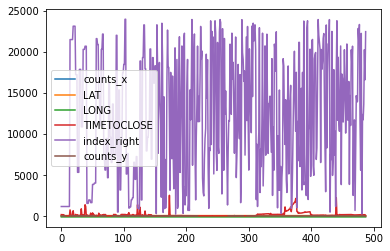

In [56]:
blockcountgdf2.plot()
ctx.add_basemap